In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime

# plot lib
import matplotlib.pyplot as plt
import seaborn as sns 

# ML Lib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pickle

## getting data from MATLAB Simulation (folder : Training data)

In [3]:
current_dir = Path().resolve()
parent_dir = current_dir.parent
training_path = '%s/training_data' %parent_dir 

In [4]:
first_file = 0
for file in os.listdir(training_path):
    if first_file == 0 and '.csv' in file:
        df = pd.read_csv('%s/%s' % (training_path, file), encoding='ISO-8859-1')
        print('%s : %s' % (file, len(df)))
        first_file = 1
    elif first_file == 1 and '.csv' in file:
        df_temp = pd.read_csv('%s/%s' % (training_path, file), encoding='ISO-8859-1')
        print('%s : %s' % (file, len(df_temp)))
        df = pd.concat([df, df_temp], axis=0, ignore_index=True, sort=False)

print('             Total: %s' % len(df))

dataset_n0_0.35.csv : 10000
dataset_n0_0.20.csv : 10000
dataset_n0_0.30.csv : 10000
dataset_n0_0.25.csv : 10000
dataset_n0_0.55.csv : 10000
dataset_n0_0.40.csv : 10000
dataset_n0_0.95.csv : 10000
dataset_n0_0.80.csv : 10000
dataset_n0_0.90.csv : 10000
dataset_n0_0.85.csv : 10000
dataset_n0_0.50.csv : 10000
dataset_n0_0.45.csv : 10000
dataset_n0_0.60.csv : 10000
dataset_n0_0.75.csv : 10000
dataset_n0_0.65.csv : 10000
dataset_n0_0.70.csv : 10000
dataset_n0_0.15.csv : 10000
dataset_n0_0.05.csv : 10000
dataset_n0_0.10.csv : 10000
             Total: 190000


In [5]:
df

,m,r1,r2,mrec_map,mrec_ml,N0
0,3,0.756,-0.223,3,3,0.35
1,3,0.642,-1.344,3,3,0.35
2,0,1.249,0.624,0,0,0.35
3,0,0.847,0.385,0,0,0.35
4,1,-0.941,0.301,1,1,0.35
...,...,...,...,...,...,...
189995,3,0.839,-0.666,3,3,0.10
189996,3,1.246,-1.109,3,3,0.10
189997,0,0.657,0.378,0,0,0.10
189998,1,-0.371,0.793,1,1,0.10


## Loading model to data

In [6]:
model_path = "%s/model" %parent_dir
model_file = "receiver_model_20251123.pkl"
load_model_path = "%s/%s" %(model_path, model_file)

In [7]:
# parameter that need for model
X = df[['r1', 'r2', 'N0']]

In [8]:
with open("%s" %load_model_path, "rb") as f:
    pipe = pickle.load(f)

df['m_pred_lr'] = pipe.predict(X)

In [9]:
df

,m,r1,r2,mrec_map,mrec_ml,N0,m_pred_lr
0,3,0.756,-0.223,3,3,0.35,3
1,3,0.642,-1.344,3,3,0.35,3
2,0,1.249,0.624,0,0,0.35,0
3,0,0.847,0.385,0,0,0.35,0
4,1,-0.941,0.301,1,1,0.35,1
...,...,...,...,...,...,...,...
189995,3,0.839,-0.666,3,3,0.10,3
189996,3,1.246,-1.109,3,3,0.10,3
189997,0,0.657,0.378,0,0,0.10,0
189998,1,-0.371,0.793,1,1,0.10,1


## Symbol Error Probability ML vs MAP vs LinearRegression

In [12]:
df['map_error'] = 0
df['ml_error'] = 0
df['lr_error'] = 0 
df['count'] = 1

df.loc[(df['mrec_map'] != df['m']), "map_error"] = 1
df.loc[(df['mrec_ml'] != df['m']), "ml_error"] = 1
df.loc[(df['m_pred_lr'] != df['m']), "lr_error"] = 1

In [13]:
df

,m,r1,r2,mrec_map,mrec_ml,N0,m_pred_lr,map_error,ml_error,lr_error,count
0,3,0.756,-0.223,3,3,0.35,3,0,0,0,1
1,3,0.642,-1.344,3,3,0.35,3,0,0,0,1
2,0,1.249,0.624,0,0,0.35,0,0,0,0,1
3,0,0.847,0.385,0,0,0.35,0,0,0,0,1
4,1,-0.941,0.301,1,1,0.35,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
189995,3,0.839,-0.666,3,3,0.10,3,0,0,0,1
189996,3,1.246,-1.109,3,3,0.10,3,0,0,0,1
189997,0,0.657,0.378,0,0,0.10,0,0,0,0,1
189998,1,-0.371,0.793,1,1,0.10,1,0,0,0,1


In [17]:
df_error = df[['N0', 'map_error','ml_error','lr_error','count']]

In [18]:
df_error

,N0,map_error,ml_error,lr_error,count
0,0.35,0,0,0,1
1,0.35,0,0,0,1
2,0.35,0,0,0,1
3,0.35,0,0,0,1
4,0.35,0,0,0,1
...,...,...,...,...,...
189995,0.10,0,0,0,1
189996,0.10,0,0,0,1
189997,0.10,0,0,0,1
189998,0.10,0,0,0,1


In [19]:
df_error_agg = df_error.groupby('N0', as_index=False).agg({'map_error': 'sum',
                                                          'ml_error': 'sum',
                                                          'lr_error': 'sum',
                                                          'count': 'sum'})

In [21]:
df_error_agg['map_SER'] = df_error_agg['map_error'] / df_error_agg['count']
df_error_agg['ml_SER']  = df_error_agg['ml_error']  / df_error_agg['count']
df_error_agg['lr_SER']  = df_error_agg['lr_error']  / df_error_agg['count']

In [22]:
df_error_agg

,N0,map_error,ml_error,lr_error,count,map_SER,ml_SER,lr_SER
0,0.05,0,0,3,10000,0.0000,0.0000,0.0003
1,0.10,15,16,36,10000,0.0015,0.0016,0.0036
2,0.15,78,105,112,10000,0.0078,0.0105,0.0112
3,0.20,187,243,222,10000,0.0187,0.0243,0.0222
4,0.25,327,433,353,10000,0.0327,0.0433,0.0353
5,0.30,487,665,516,10000,0.0487,0.0665,0.0516
6,0.35,624,848,643,10000,0.0624,0.0848,0.0643
7,0.40,810,1089,818,10000,0.0810,0.1089,0.0818
8,0.45,1004,1331,993,10000,0.1004,0.1331,0.0993
9,0.50,1190,1527,1185,10000,0.1190,0.1527,0.1185


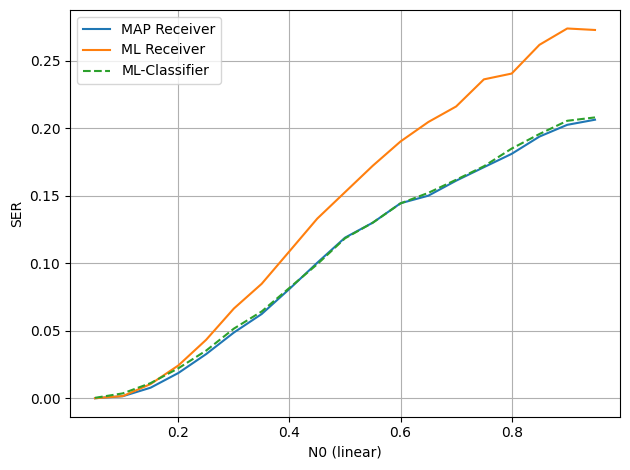

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_error_agg["N0"], df_error_agg["map_SER"], label="MAP Receiver")
plt.plot(df_error_agg["N0"], df_error_agg["ml_SER"], label="ML Receiver")          # dashed
plt.plot(df_error_agg["N0"], df_error_agg["lr_SER"], '--', label="ML-Classifier")

plt.xlabel("N0 (linear)")
plt.ylabel("SER")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()